# Setup

In [1]:
import sys
sys.path.append('../../')

import CCfrag

# Creating queries for AlphaFold

In [2]:
INPUT_FASTA = 'MYOSIN.fasta'

In [5]:
for win_len, overlap in [[70, 35], [50,25], [30,15], [20,10]]:
	for nmer in [2]:
		divider = CCfrag.Divider(L=win_len, O=overlap, nmer=nmer)
		divider.generate_queries(INPUT_FASTA, 'CCfrag_constructs_MYOSIN', format='single_fasta')

>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)
>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)
>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)
>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)


In [6]:
!ls CCfrag_constructs_MYOSIN/MYOSIN/

2_20_10  2_30_15  2_50_25  2_70_35  source_MYOSIN.fasta


In [7]:
!ls  CCfrag_constructs_MYOSIN/MYOSIN/2_20_10/

constructs.csv	parameters.json  queries


In [8]:
!ls CCfrag_constructs_MYOSIN/MYOSIN/2_20_10/queries/

MYOSIN_2_0-20.fasta	  MYOSIN_2_1580-1600.fasta  MYOSIN_2_40-60.fasta
MYOSIN_2_1000-1020.fasta  MYOSIN_2_1590-1610.fasta  MYOSIN_2_410-430.fasta
MYOSIN_2_100-120.fasta	  MYOSIN_2_1600-1620.fasta  MYOSIN_2_420-440.fasta
MYOSIN_2_1010-1030.fasta  MYOSIN_2_160-180.fasta    MYOSIN_2_430-450.fasta
MYOSIN_2_1020-1040.fasta  MYOSIN_2_1610-1630.fasta  MYOSIN_2_440-460.fasta
MYOSIN_2_1030-1050.fasta  MYOSIN_2_1620-1640.fasta  MYOSIN_2_450-470.fasta
MYOSIN_2_10-30.fasta	  MYOSIN_2_1630-1650.fasta  MYOSIN_2_460-480.fasta
MYOSIN_2_1040-1060.fasta  MYOSIN_2_1640-1660.fasta  MYOSIN_2_470-490.fasta
MYOSIN_2_1050-1070.fasta  MYOSIN_2_1650-1670.fasta  MYOSIN_2_480-500.fasta
MYOSIN_2_1060-1080.fasta  MYOSIN_2_1660-1680.fasta  MYOSIN_2_490-510.fasta
MYOSIN_2_1070-1090.fasta  MYOSIN_2_1670-1690.fasta  MYOSIN_2_500-520.fasta
MYOSIN_2_1080-1100.fasta  MYOSIN_2_1680-1700.fasta  MYOSIN_2_50-70.fasta
MYOSIN_2_1090-1110.fasta  MYOSIN_2_1690-1710.fasta  MYOSIN_2_510-530.fasta
MYOSIN_2_1100-1120.fasta  MYOSIN_2_17

# Running AlphaFold

In [10]:
%%bash

cd CCfrag_constructs_MYOSIN/MYOSIN
ROOT_FOLDER=$(pwd)

for i in $(ls -d */)
do
echo $i
cd $ROOT_FOLDER
cd $i

# this line will predict models for all the FASTA files inside the 'queries' folder,
# and output the resulting files to the 'predictions' folder
colabfold_batch queries predictions --num-recycle=5

done

2_20_10/
2_30_15/
2_50_25/
2_70_35/


In [11]:
!du -h -d 1 | grep CCfrag

668M	./CCfrag_constructs_MYOSIN


# Creating the CCfrag assembly

In [12]:
import matplotlib.pyplot as plt

## ColabFold

In [13]:
integrator = CCfrag.Integrator(path_fragments='CCfrag_constructs_MYOSIN/MYOSIN/',
                               list_features=['plddt', 'para', 'kih', 'pae'],
                               data_output='DATA_CCfrag.csv')

In [14]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of MYOSIN ...
MYOSIN read as a sequence of length 1979
Found 4 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/


In [15]:
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_20_10_pae,2_30_15_plddt,2_30_15_para,2_30_15_kih,2_30_15_pae,2_50_25_plddt,2_50_25_para,2_50_25_kih,2_50_25_pae,2_70_35_plddt,2_70_35_para,2_70_35_kih,2_70_35_pae
0,M,0,32.160,0.0,0.0,11.480919,39.200,0.0,0.0,11.966439,35.4050,1.0,0.0,13.961986,41.860,0.0,0.0,15.712832
1,S,1,37.160,0.0,0.0,11.480919,42.050,0.0,0.0,11.966439,36.0150,1.0,0.0,13.961986,50.390,0.0,0.0,15.712832
2,Q,2,44.910,0.0,0.0,11.480919,50.640,0.0,0.0,11.966439,39.6550,1.0,0.0,13.961986,53.190,0.0,0.0,15.712832
3,K,3,52.285,0.0,0.0,11.480919,52.235,0.0,0.0,11.966439,40.8600,1.0,0.0,13.961986,59.705,0.0,0.0,15.712832
4,P,4,52.535,0.0,0.0,11.480919,57.435,0.0,0.0,11.966439,45.4700,1.0,0.0,13.961986,60.015,0.0,0.0,15.712832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,G,1974,40.720,0.0,0.0,12.855406,35.420,1.0,0.0,15.288353,28.2675,0.5,0.0,23.211847,37.030,1.0,0.0,21.903271
1975,K,1975,37.940,0.0,0.0,12.855406,32.300,1.0,0.0,15.288353,28.8050,0.0,0.0,23.384424,39.580,1.0,0.0,21.903271
1976,A,1976,38.405,0.0,0.0,12.855406,31.630,1.0,0.0,15.288353,28.4800,0.0,0.0,23.384424,41.300,1.0,0.0,21.903271
1977,S,1977,39.265,0.0,0.0,12.855406,32.145,1.0,0.0,15.288353,25.6950,0.0,0.0,23.384424,37.140,1.0,0.0,21.903271


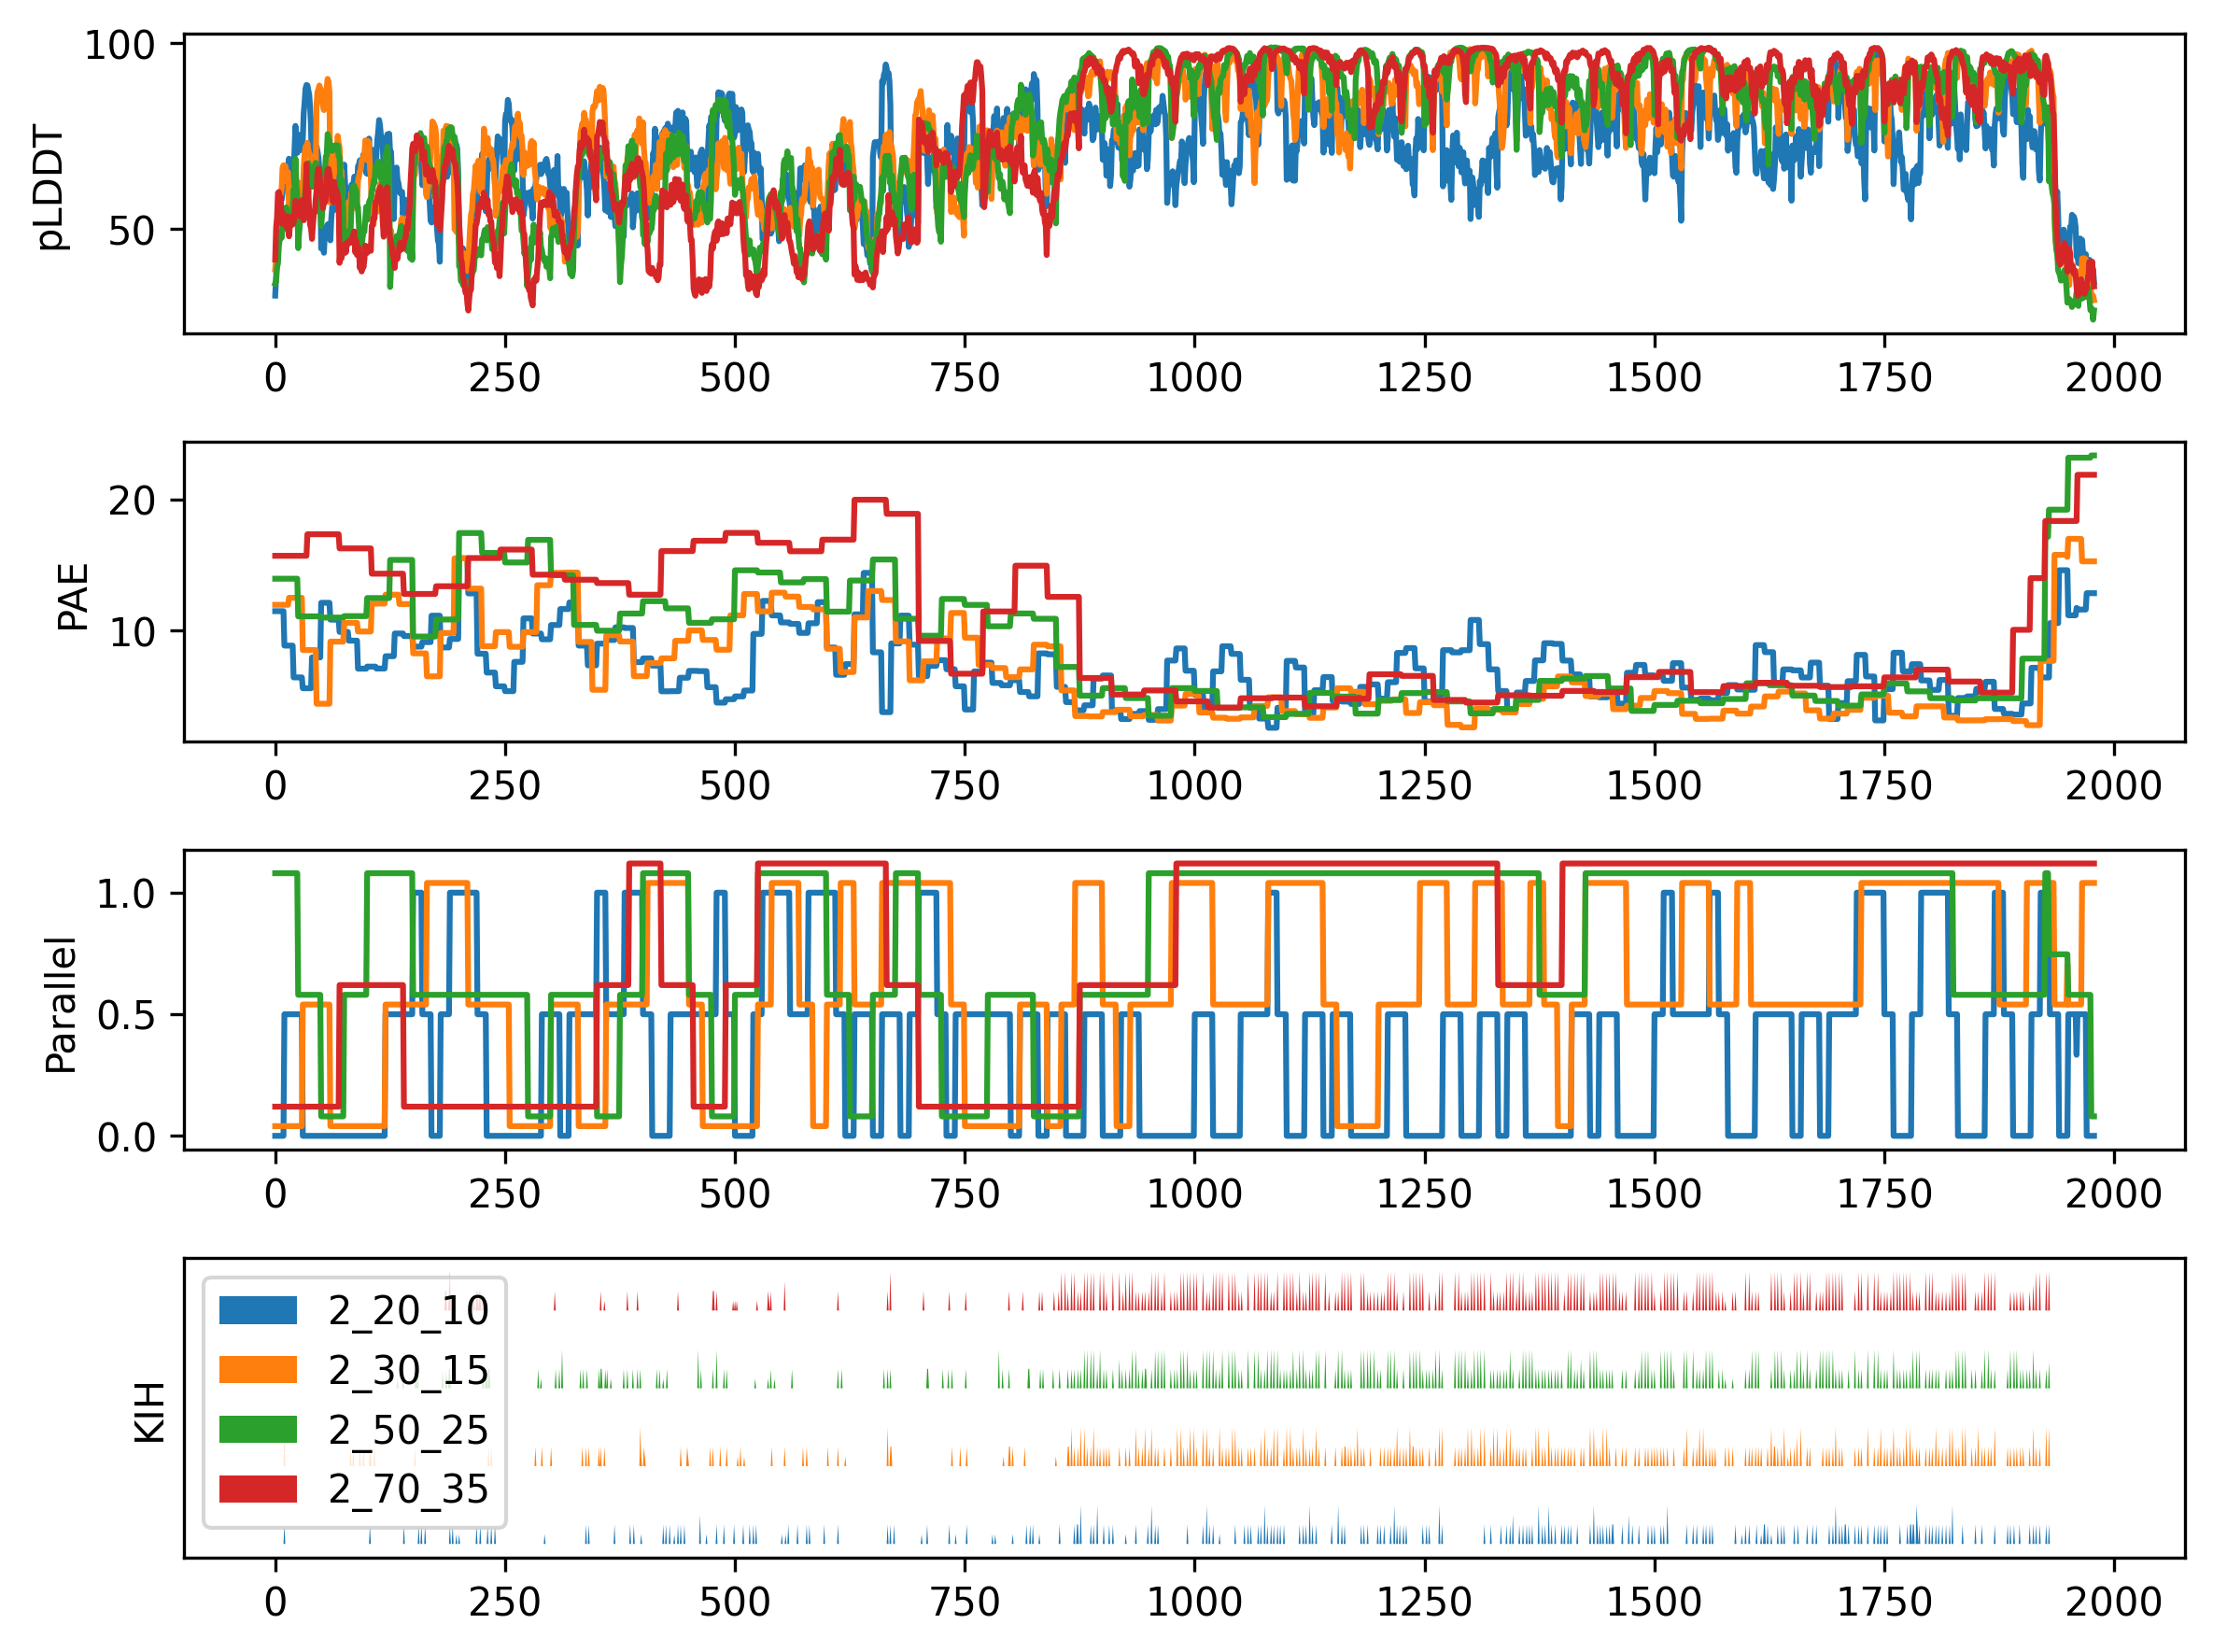

In [21]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), dpi=300)

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend(loc='upper left')
plt.tight_layout()
#plt.vlines(x=580, ymin=0,ymax=100)